# Number of time indexes ~ epsilon

In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import UnivariateSpline

## 1. 100 Evenly Distributed epsilons

In [13]:
epsilon_values = [0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
       0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
       0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
       0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
       0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
       0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
       0.30372727, 0.31381818, 0.32390909, 0.334     , 0.34409091,
       0.35418182, 0.36427273, 0.37436364, 0.38445455, 0.39454545,
       0.40463636, 0.41472727, 0.42481818, 0.43490909, 0.445     ,
       0.45509091, 0.46518182, 0.47527273, 0.48536364, 0.49545455,
       0.50554545, 0.51563636, 0.52572727, 0.53581818, 0.54590909,
       0.556     , 0.56609091, 0.57618182, 0.58627273, 0.59636364,
       0.60645455, 0.61654545, 0.62663636, 0.63672727, 0.64681818,
       0.65690909, 0.667     , 0.67709091, 0.68718182, 0.69727273,
       0.70736364, 0.71745455, 0.72754545, 0.73763636, 0.74772727,
       0.75781818, 0.76790909, 0.778     , 0.78809091, 0.79818182,
       0.80827273, 0.81836364, 0.82845455, 0.83854545, 0.84863636,
       0.85872727, 0.86881818, 0.87890909, 0.889     , 0.89909091,
       0.90918182, 0.91927273, 0.92936364, 0.93945455, 0.94954545,
       0.95963636, 0.96972727, 0.97981818, 0.98990909, 1.        ]

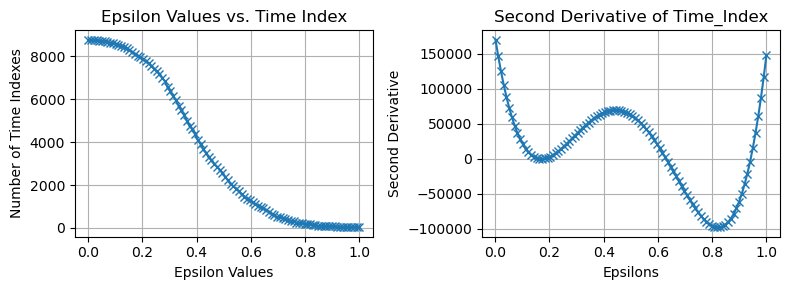

In [20]:
# Plot epsilon values vs. time index
fig, ax = plt.subplots(1, 2, figsize=(8, 3))  # Side-by-side plots

# First plot: Epsilon Values vs. Time Index
ax[0].plot(df_eps_time_indexes["eps"], df_eps_time_indexes["Time_Index"], marker="x")
ax[0].set_xlabel("Epsilon Values")
ax[0].set_ylabel("Number of Time Indexes")
ax[0].set_title("Epsilon Values vs. Time Index")
ax[0].grid(True)

# Second plot: Second Derivative of Time_Index
ax[1].plot(df_eps_time_indexes["eps"], d2_values, marker="x", label="Second Derivative")
ax[1].set_xlabel("Epsilons")
ax[1].set_ylabel("Second Derivative")
ax[1].set_title("Second Derivative of Time_Index")
ax[1].grid(True)

# 🔹 FIX: Adjust layout to prevent overlapping
plt.tight_layout()  

# Show the plot
plt.show()


In [5]:
df_eps_time_indexes.head(40)

,eps,Time_Index
100,1.000000,30.0
99,0.989909,35.0
98,0.979818,37.0
97,0.969727,37.0
96,0.959636,39.0
95,0.949545,48.0
94,0.939455,49.0
93,0.929364,58.0
92,0.919273,69.0
91,0.909182,74.0


## 2. 100 unevenly distributed epsilons V1

In [6]:



base_dir = r"C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon"

df_eps_time_indexes = [ {}]

# Array of epsilon values
epsilon_values = [0.001     , 0.00714915, 0.0132983 , 0.01944744, 0.02559659,
       0.03174574, 0.03789489, 0.04404403, 0.05019318, 0.05634233,
       0.06249148, 0.06864062, 0.07478977, 0.08093892, 0.08708807,
       0.09323721, 0.09938636, 0.10553551, 0.11168466, 0.11783381,
       0.12398295, 0.1301321 , 0.13628125, 0.1424304 , 0.14857954,
       0.15472869, 0.16087784, 0.16702699, 0.17317613, 0.17932528,
       0.18547443, 0.19162358, 0.19777273, 0.20392187, 0.21007102,
       0.21622017, 0.22236932, 0.22851846, 0.23466761, 0.24081676,
       0.24696591, 0.25311505, 0.2592642 , 0.26541335, 0.2715625 ,
       0.27771164, 0.28386079, 0.29000994, 0.29615909, 0.30230824,
       0.30845738, 0.31460653, 0.32075568, 0.32690483, 0.33305397,
       0.33920312, 0.34535227, 0.35150142, 0.35765056, 0.36379971,
       0.36994886, 0.37609801, 0.38224715, 0.3883963 , 0.39454545,
       0.40463636, 0.42214706, 0.43965775, 0.45716845, 0.47467914,
       0.49218984, 0.50970053, 0.52721123, 0.54472192, 0.56223262,
       0.57974331, 0.59725401, 0.6147647 , 0.6322754 , 0.64978609,
       0.66729679, 0.68480748, 0.70231818, 0.71982888, 0.73733957,
       0.75485027, 0.77236096, 0.78987166, 0.80738235, 0.82489305,
       0.84240374, 0.85991444, 0.87742513, 0.89493583, 0.91244652,
       0.92995722, 0.94746791, 0.96497861, 0.9824893 , 1.        ]

# Iterate through each epsilon value
for eps in epsilon_values:
    folder_name = f"system_epsilon_{eps}"
    folder_path = os.path.join(base_dir, folder_name)

    if os.path.isdir(folder_path):
        print(f"Folder exists: {folder_path}")
        demand_suffix = "Demand_data.csv"
        demand_path = os.path.join(folder_path, demand_suffix)

        df_demand = pd.read_csv(demand_path)
        qt_time_index = df_demand["Time_Index"].notna().sum()

        dict_eps_time_index = {"eps": eps, "Time_Index": qt_time_index}
        df_eps_time_indexes.append(dict_eps_time_index)

    else:
        print(f"Folder does not exist: {folder_path}")


Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.001
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.00714915
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.0132983
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.01944744
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.02559659
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.03174574
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.03789489
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.04404403
Folder exists: C:\Users\Diego\GenX\GenX.jl-mai

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

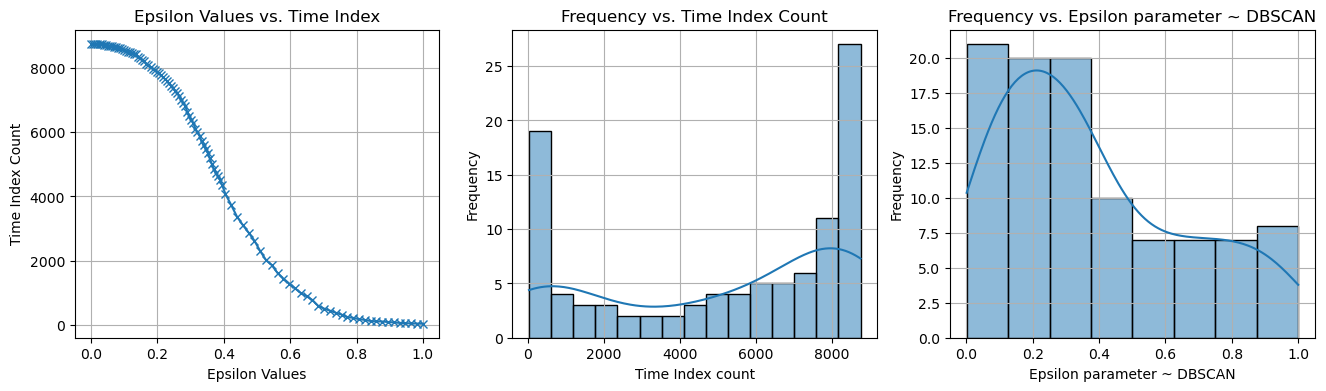

In [7]:
df_eps_time_indexes = pd.DataFrame(df_eps_time_indexes)
df_eps_time_indexes = df_eps_time_indexes.sort_values(by="eps")

# Plot epsilon values vs. time index
fig, ax = plt.subplots(1,3, figsize=(16,4))
ax[0].plot(df_eps_time_indexes["eps"], df_eps_time_indexes["Time_Index"], marker="x")
ax[0].set_xlabel("Epsilon Values")
ax[0].set_ylabel("Time Index Count")
ax[0].set_title("Epsilon Values vs. Time Index")
ax[0].grid(True)

sns.histplot(df_eps_time_indexes["Time_Index"], bins=15, kde=True, ax=ax[1])
ax[1].set_xlabel("Time Index count")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Frequency vs. Time Index Count")
ax[1].grid(True)

sns.histplot(df_eps_time_indexes["eps"], kde=True, ax=ax[2])
ax[2].set_xlabel("Epsilon parameter ~ DBSCAN")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Frequency vs. Epsilon parameter ~ DBSCAN")
ax[2].grid(True)

## 3. 16 epsilons, 13 in [0.001, 0.38] and 3 in [0.57, 1.0]

In [8]:
epsilon_values = [0.001 , 0.02559659, 0.04404403, 0.08093892,  0.10553551, 0.12398295, 0.1424304, 0.16087784, 0.19162358, 0.23466761, 0.27771164, 0.31460653, 
0.38224715, 0.57974331, 0.78987166, 1.0]

Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.001
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.02559659
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.04404403
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.08093892
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.10553551
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.12398295
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.1424304
Folder exists: C:\Users\Diego\GenX\GenX.jl-main\example_systems\1_three_zones\systems_epsilon\system_epsilon_0.16087784
Folder exists: C:\Users\Diego\GenX\GenX.jl-mai

c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Diego\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

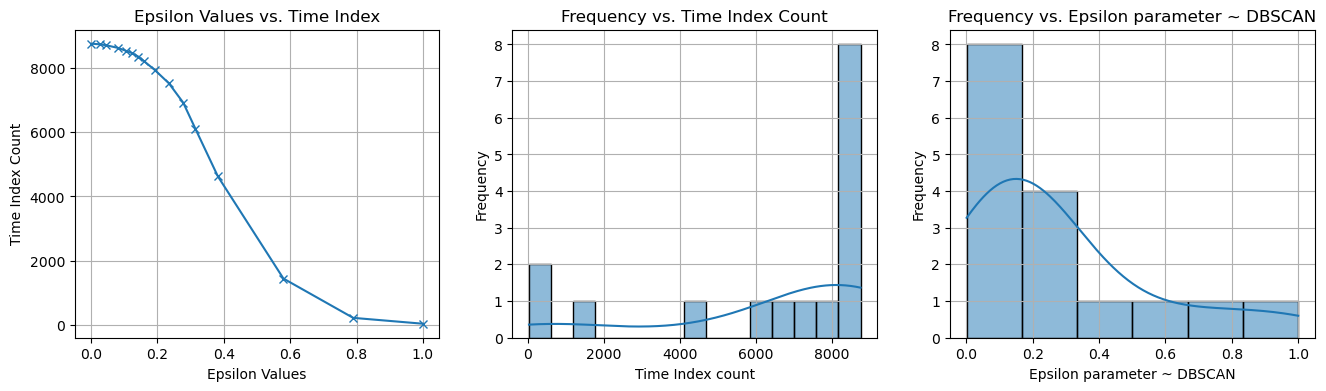

In [9]:
df_eps_time_indexes = [ {}]

# Iterate through each epsilon value
for eps in epsilon_values:
    folder_name = f"system_epsilon_{eps}"
    folder_path = os.path.join(base_dir, folder_name)

    if os.path.isdir(folder_path):
        print(f"Folder exists: {folder_path}")
        demand_suffix = "Demand_data.csv"
        demand_path = os.path.join(folder_path, demand_suffix)

        df_demand = pd.read_csv(demand_path)
        qt_time_index = df_demand["Time_Index"].notna().sum()

        dict_eps_time_index = {"eps": eps, "Time_Index": qt_time_index}
        df_eps_time_indexes.append(dict_eps_time_index)

    else:
        print(f"Folder does not exist: {folder_path}")

df_eps_time_indexes = pd.DataFrame(df_eps_time_indexes)
df_eps_time_indexes = df_eps_time_indexes.sort_values(by="eps")

# Plot epsilon values vs. time index
fig, ax = plt.subplots(1,3, figsize=(16,4))
ax[0].plot(df_eps_time_indexes["eps"], df_eps_time_indexes["Time_Index"], marker="x")
ax[0].set_xlabel("Epsilon Values")
ax[0].set_ylabel("Time Index Count")
ax[0].set_title("Epsilon Values vs. Time Index")
ax[0].grid(True)

sns.histplot(df_eps_time_indexes["Time_Index"], bins=15, kde=True, ax=ax[1])
ax[1].set_xlabel("Time Index count")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Frequency vs. Time Index Count")
ax[1].grid(True)

sns.histplot(df_eps_time_indexes["eps"], kde=True, ax=ax[2])
ax[2].set_xlabel("Epsilon parameter ~ DBSCAN")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Frequency vs. Epsilon parameter ~ DBSCAN")
ax[2].grid(True)